In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
## Data Preprocessing
## Traning Image Preprocessing

training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 5876 files belonging to 38 classes.


In [4]:
##   Validation Image Prerocessing

validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

Found 5776 files belonging to 38 classes.
tf.Tensor(
[[[[101.5   91.5   99.5 ]
   [102.5   92.5  100.5 ]
   [109.5   99.5  107.5 ]
   ...
   [133.   126.   133.  ]
   [134.75 127.75 134.75]
   [135.5  128.5  135.5 ]]

  [[102.25  92.25 100.25]
   [104.    94.   102.  ]
   [103.75  93.75 101.75]
   ...
   [126.25 119.25 126.25]
   [136.25 129.25 136.25]
   [126.5  119.5  126.5 ]]

  [[103.5   93.5  101.5 ]
   [103.5   93.5  101.5 ]
   [103.    93.   101.  ]
   ...
   [132.5  125.5  132.5 ]
   [131.5  124.5  131.5 ]
   [126.   119.   126.  ]]

  ...

  [[119.   113.   117.  ]
   [121.5  115.5  119.5 ]
   [120.75 114.75 118.75]
   ...
   [166.   160.   162.  ]
   [170.5  164.5  166.5 ]
   [167.   161.   163.  ]]

  [[120.5  114.5  118.5 ]
   [122.5  116.5  120.5 ]
   [121.25 115.25 119.25]
   ...
   [167.5  161.5  163.5 ]
   [162.5  156.5  158.5 ]
   [166.25 160.25 162.25]]

  [[126.25 120.25 124.25]
   [125.5  119.5  123.5 ]
   [125.75 119.75 123.75]
   ...
   [168.75 162.75 164.75]
   [

In [5]:
## Building Model
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
model = Sequential()

In [6]:

##Building Convolution Layer
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=1500,activation='relu'))

model.add(Dropout(0.4))

C:\Users\Harsh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
##Output Layer
model.add(Dense(units=38,activation='softmax'))

In [8]:
##Compiling Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
### MODEL TRAINING

training_history = model.fit(x=training_set,validation_data=validation_set, epochs=10)

#Model Evaluation
#Model Evaluation on Training set
train_loss, train_acc=model.evaluate(training_set)
print(train_loss, train_acc)

#Model on validation set
val_loss, val_acc=model.evaluate(validation_set)
print (val_loss,val_acc)

Epoch 1/10


 14/184 ━━━━━━━━━━━━━━━━━━━━ 1:47 632ms/step - accuracy: 0.0222 - loss: 4.5340

KeyboardInterrupt: 

In [9]:
from tensorflow.keras.models import load_model
model=load_model("trained_model.keras")


In [10]:
#Model Evaluation on Training set

train_loss, train_acc=model.evaluate(training_set)

184/184 ━━━━━━━━━━━━━━━━━━━━ 29s 155ms/step - accuracy: 0.9700 - loss: 0.1064


In [11]:
print(train_loss, train_acc)

0.10582627356052399 0.9726004004478455


In [12]:
#Model on validation set

val_loss, val_acc=model.evaluate(validation_set)


181/181 ━━━━━━━━━━━━━━━━━━━━ 28s 156ms/step - accuracy: 0.7908 - loss: 0.7811


In [13]:
print (val_loss,val_acc)

0.8083187341690063 0.7842797636985779


In [21]:
'''Saving Model
model.save("trained_model.keras")
training_history.history

NameError: name 'training_history' is not defined

In [22]:
''' Recording History in json
import json
with open("training_hist.json","w") as f:
  json.dump(training_history.history, f)

NameError: name 'training_history' is not defined

In [15]:
#Accuracy Visualization
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history["accuracy"],color="red", label="Training Accuracy")
plt.plot(epochs,training_history.history["val_accuracy"],color="blue", label="validation Accuracy")
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

NameError: name 'training_history' is not defined

In [16]:
#Some other metrics for model Evaluation
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [17]:
test_set= tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 5776 files belonging to 38 classes.


In [18]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape


181/181 ━━━━━━━━━━━━━━━━━━━━ 29s 158ms/step


(array([[2.7225468e-01, 1.1894288e-05, 1.2197444e-04, ..., 8.4334499e-07,
         3.7022747e-09, 1.2944694e-04],
        [2.7186233e-01, 5.7391485e-04, 1.7909697e-06, ..., 1.0246512e-06,
         5.7336938e-06, 2.9701478e-06],
        [2.2949208e-01, 3.3325683e-05, 1.1182923e-06, ..., 1.5015970e-06,
         9.8880637e-06, 4.7836984e-06],
        ...,
        [3.2764470e-07, 4.1669153e-07, 2.2521235e-08, ..., 1.6264553e-09,
         5.0878843e-05, 9.9066097e-01],
        [1.2398508e-06, 3.5276232e-04, 8.9387875e-05, ..., 3.1107508e-08,
         8.2038908e-04, 1.0766655e-01],
        [1.2258187e-02, 1.8988775e-06, 4.0157647e-05, ..., 3.5736182e-06,
         3.3443774e-07, 9.6944314e-01]], dtype=float32),
 (5776, 38))

In [19]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories


<tf.Tensor: shape=(5776,), dtype=int64, numpy=array([24, 31, 31, ..., 37, 17, 37], dtype=int64)>

In [20]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(5776, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [21]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(5776,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_true,predicted_categories,target_names=class_name))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.67      0.63      0.65       152
                                 Apple___Black_rot       0.76      0.83      0.79       152
                          Apple___Cedar_apple_rust       0.75      0.61      0.67       152
                                   Apple___healthy       0.61      0.74      0.67       152
                               Blueberry___healthy       0.69      0.78      0.73       152
          Cherry_(including_sour)___Powdery_mildew       0.92      0.72      0.80       152
                 Cherry_(including_sour)___healthy       0.85      0.90      0.88       152
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.67      0.78       152
                       Corn_(maize)___Common_rust_       0.91      0.96      0.94       152
               Corn_(maize)___Northern_Leaf_Blight       0.78      0.87      0.

In [23]:
cm=confusion_matrix(Y_true, predicted_categories)
cm

array([[ 96,   3,   1, ...,   0,   0,   0],
       [  2, 126,   0, ...,   0,   0,   0],
       [  0,   0,  92, ...,   1,   0,   0],
       ...,
       [  0,   0,   0, ..., 138,   1,   0],
       [  0,   0,   0, ...,   0, 137,   0],
       [  1,   0,   2, ...,   0,   0, 141]], dtype=int64)

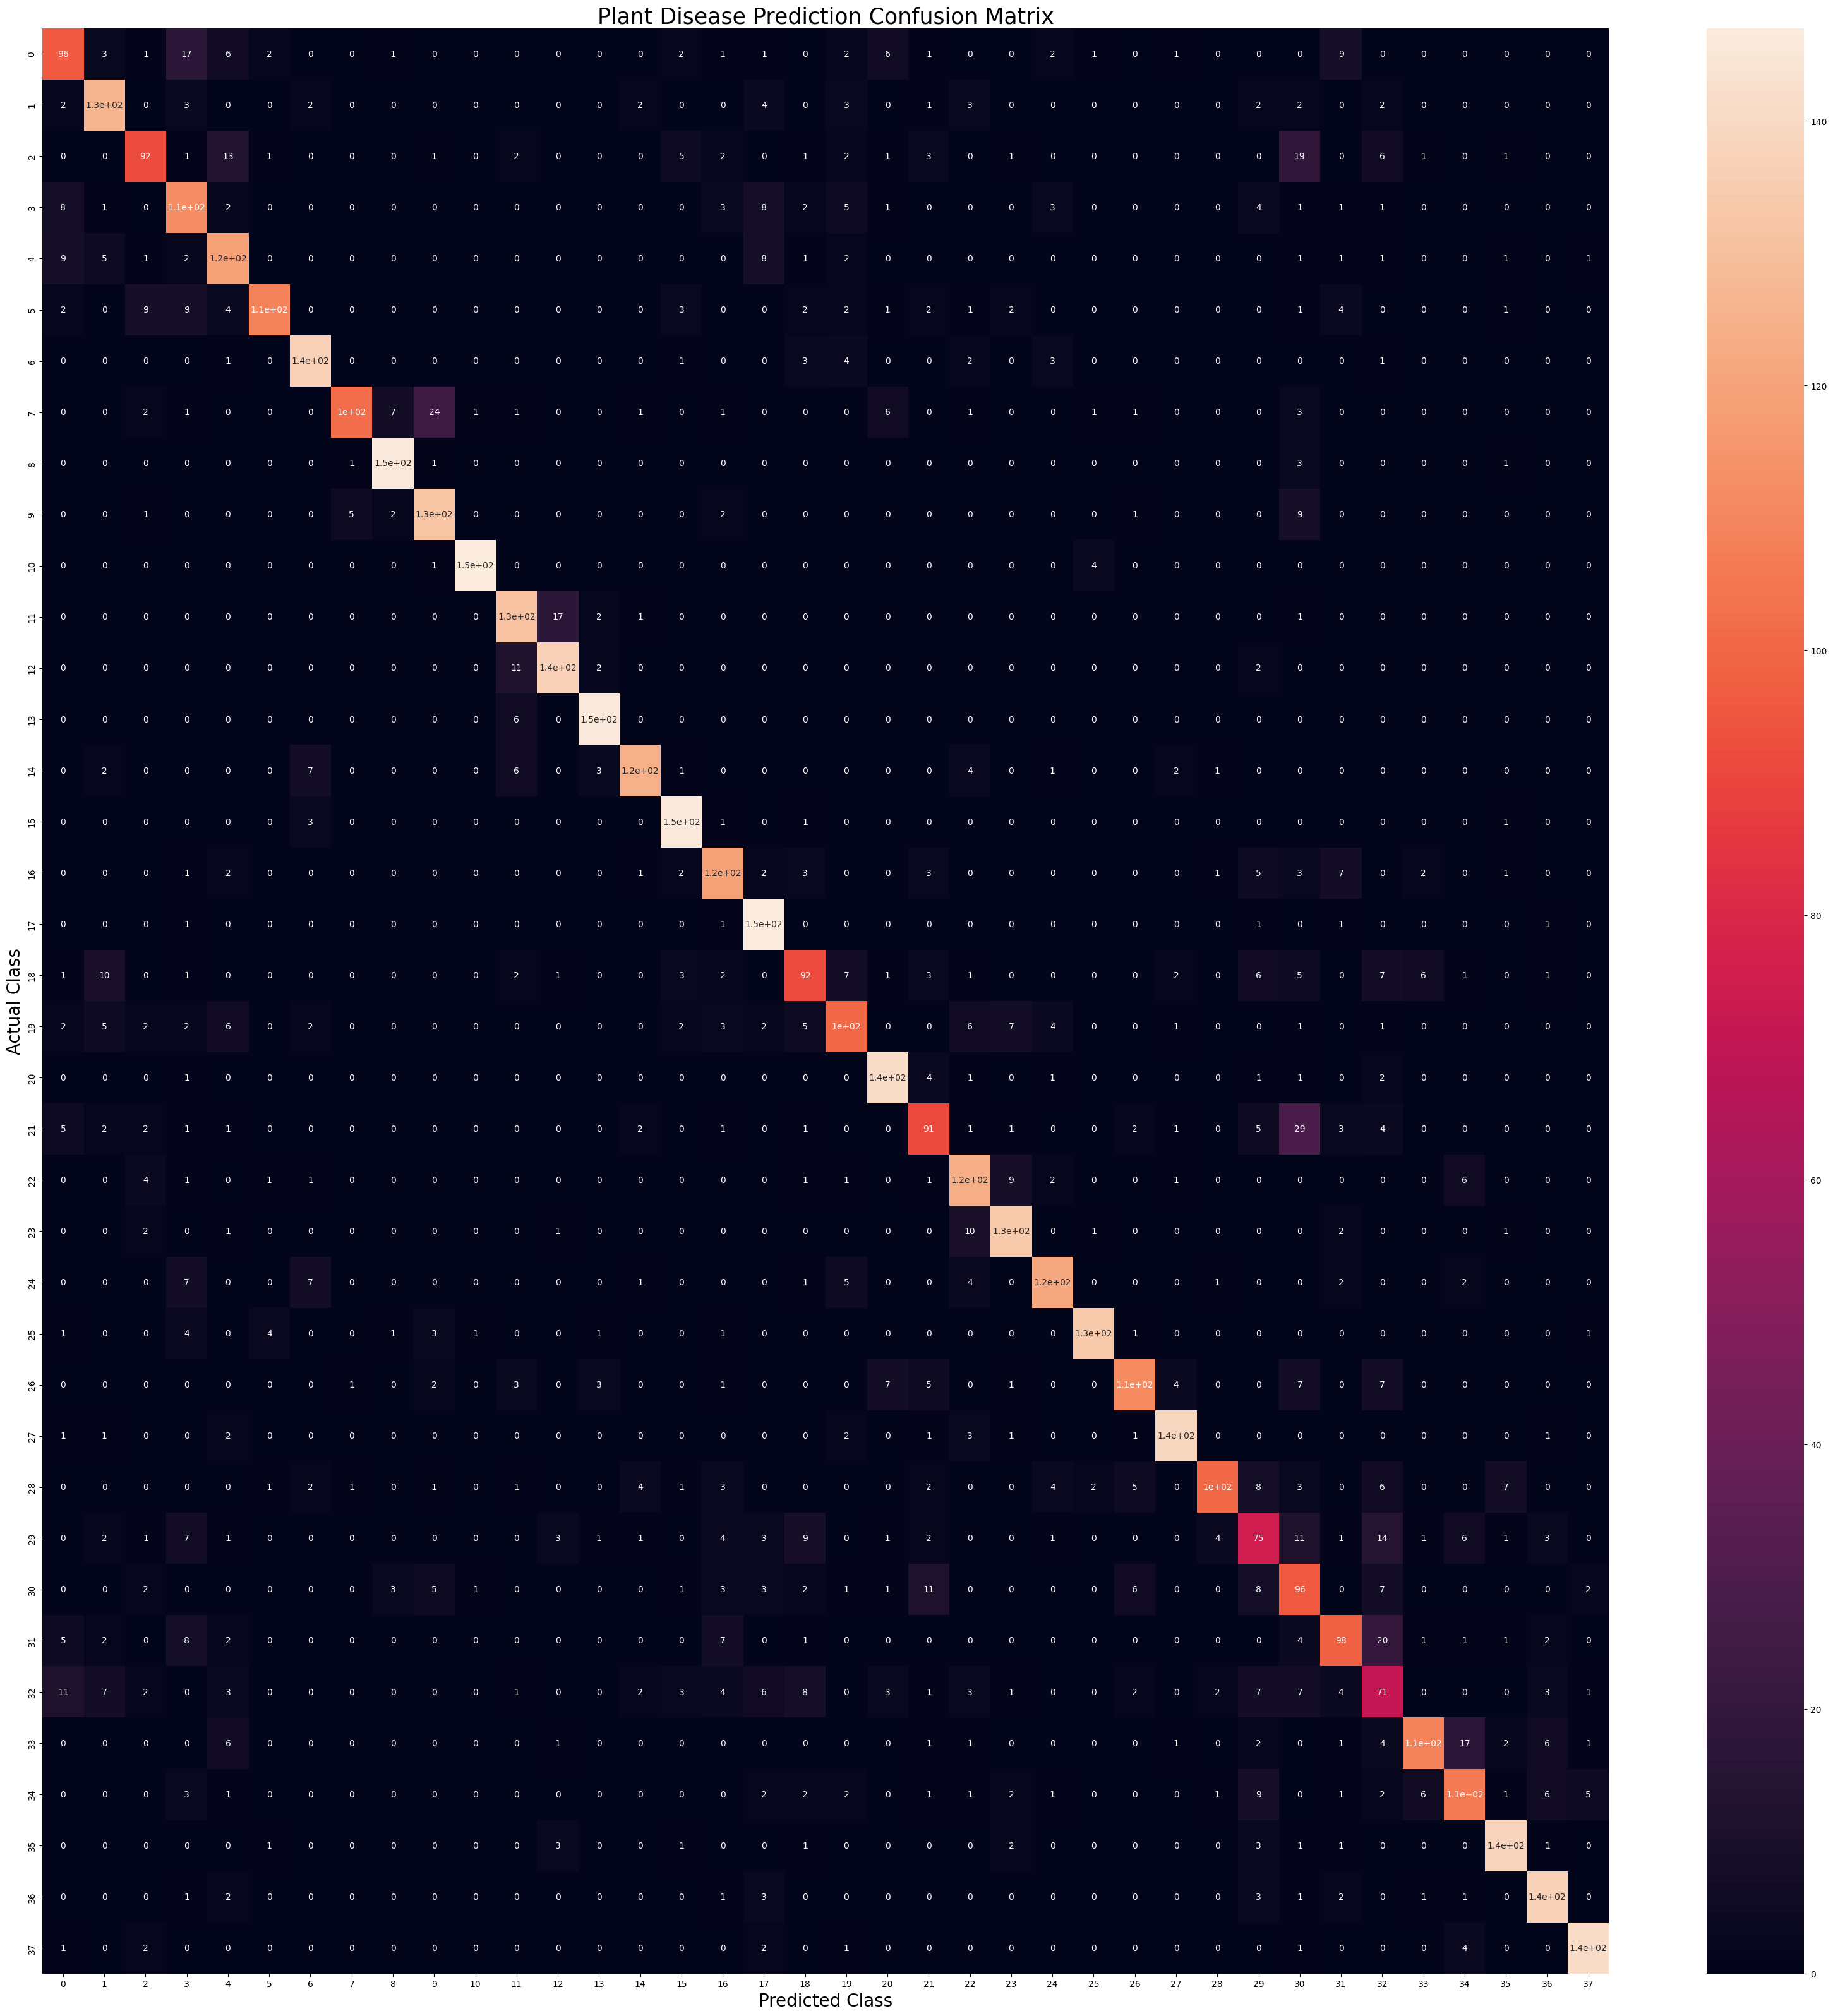

In [24]:
#Confusion Matrix Visualization
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class", fontsize=20)
plt.ylabel("Actual Class", fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=25)
plt.show()